In [1]:
import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns

In [3]:
experiment_name = "benchmark_loss_inclusions"

runs = mlflow.search_runs(experiment_names=[experiment_name],
                          output_format="list")

data = []
for run in runs:
    data.append({**run.data.metrics, **run.data.params})
df = pd.DataFrame.from_dict(data)

In [4]:
def get_recon_loss_inclusion(row):  
    if row["include_edge_recon_loss_"] == "True" and row["include_gene_expr_recon_loss_"] == "True":
        return "edge_+_gene_expr"
    elif row["include_edge_recon_loss_"] == "True" and row["include_gene_expr_recon_loss_"] == "False":
        return "only_edge"
    elif row["include_edge_recon_loss_"] == "False" and row["include_gene_expr_recon_loss_"] == "True":
        return "only_gene_expr"
    return "none"

df["recon_loss_inclusions"] = df.apply(lambda row: get_recon_loss_inclusion(row), axis=1)

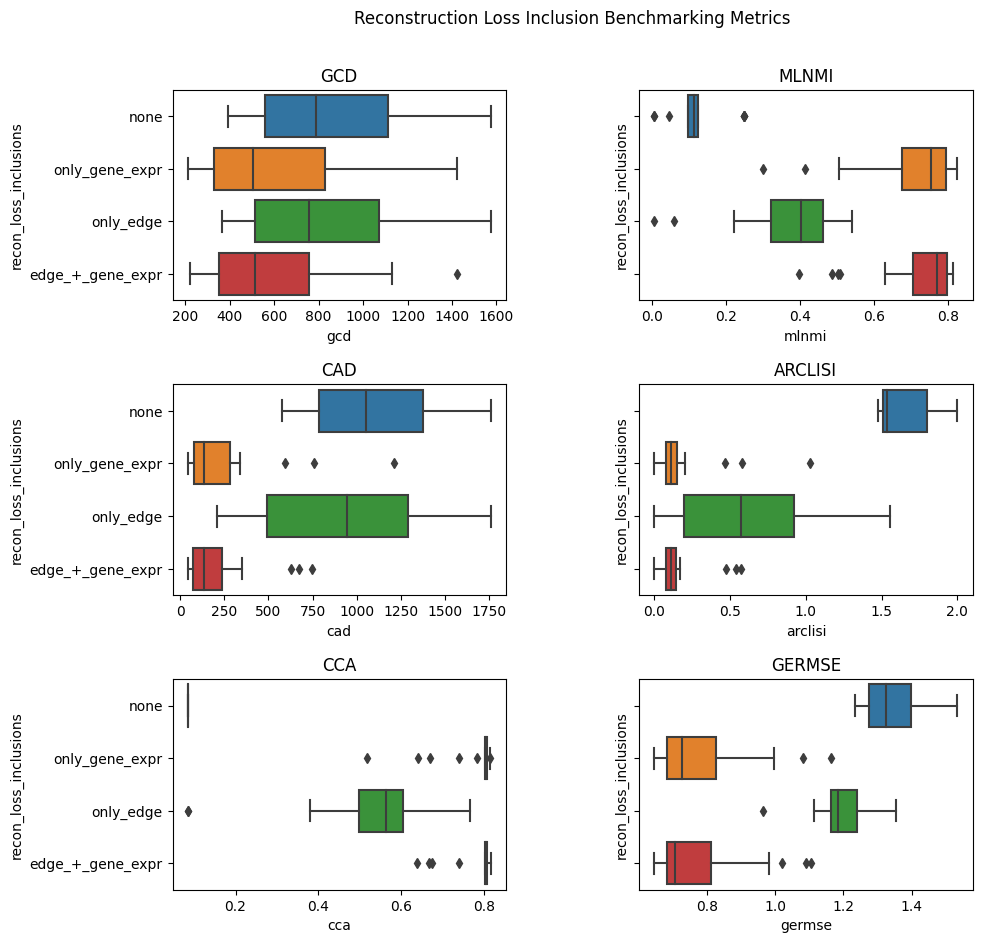

In [6]:
fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10, 10))
fig.suptitle("Reconstruction Loss Inclusion Benchmarking Metrics")

# Graph Connectivity Distance
sns.boxplot(data=df, ax=axes[0, 0], x="gcd", y="recon_loss_inclusions")
axes[0, 0].set_title("GCD")

# Maximum Leiden Normalized Mutual Info
sns.boxplot(data=df, ax=axes[0, 1], x="mlnmi", y="recon_loss_inclusions")
axes[0, 1].set_title("MLNMI")

# Cell-Type Affinity Distance
sns.boxplot(data=df, ax=axes[1, 0], x="cad", y="recon_loss_inclusions")
axes[1, 0].set_title("CAD")

# Average Absolute Log Relative Cell-Type Local Inverse Simpson's Index
sns.boxplot(data=df, ax=axes[1, 1], x="arclisi", y="recon_loss_inclusions")
axes[1, 1].set_title("ARCLISI")

# Cell Classification Accuracy
sns.boxplot(data=df, ax=axes[2, 0], x="cca", y="recon_loss_inclusions")
axes[2, 0].set_title("CCA")

# Gene Expression Regression Mean Squared Error
sns.boxplot(data=df, ax=axes[2, 1], x="germse", y="recon_loss_inclusions")
axes[2, 1].set_title("GERMSE")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

In [14]:
experiment_name = "benchmark_gene_expr_recon"

runs = mlflow.search_runs(experiment_names=[experiment_name],
                          output_format="list")

data = []
for run in runs:
    data.append({**run.data.metrics, **run.data.params})
df = pd.DataFrame.from_dict(data)

In [15]:
def get_gene_expr_recon_components(row):  
    if row["node_label_method_"] == "self" and row["gene_expr_recon_dist_"] == "nb":
        return "self_+_nb"
    elif row["node_label_method_"] == "self" and row["gene_expr_recon_dist_"] == "zinb":
        return "self_+_zinb"
    elif row["node_label_method_"] == "one-hop-sum" and row["gene_expr_recon_dist_"] == "nb":
        return "one-hop-sum_+_nb"
    elif row["node_label_method_"] == "one-hop-sum" and row["gene_expr_recon_dist_"] == "zinb":
        return "one-hop-sum_+_zinb"
    elif row["node_label_method_"] == "one-hop-norm" and row["gene_expr_recon_dist_"] == "nb":
        return "one-hop-norm_+_nb"
    elif row["node_label_method_"] == "one-hop-norm" and row["gene_expr_recon_dist_"] == "zinb":
        return "one-hop-norm_+_zinb"
    elif row["node_label_method_"] == "one-hop-attention" and row["gene_expr_recon_dist_"] == "nb":
        return "one-hop-attention_+_nb"
    return "one-hop-attention_+_zinb"

df["gene_expr_recon_components"] = df.apply(lambda row: get_gene_expr_recon_components(row), axis=1)

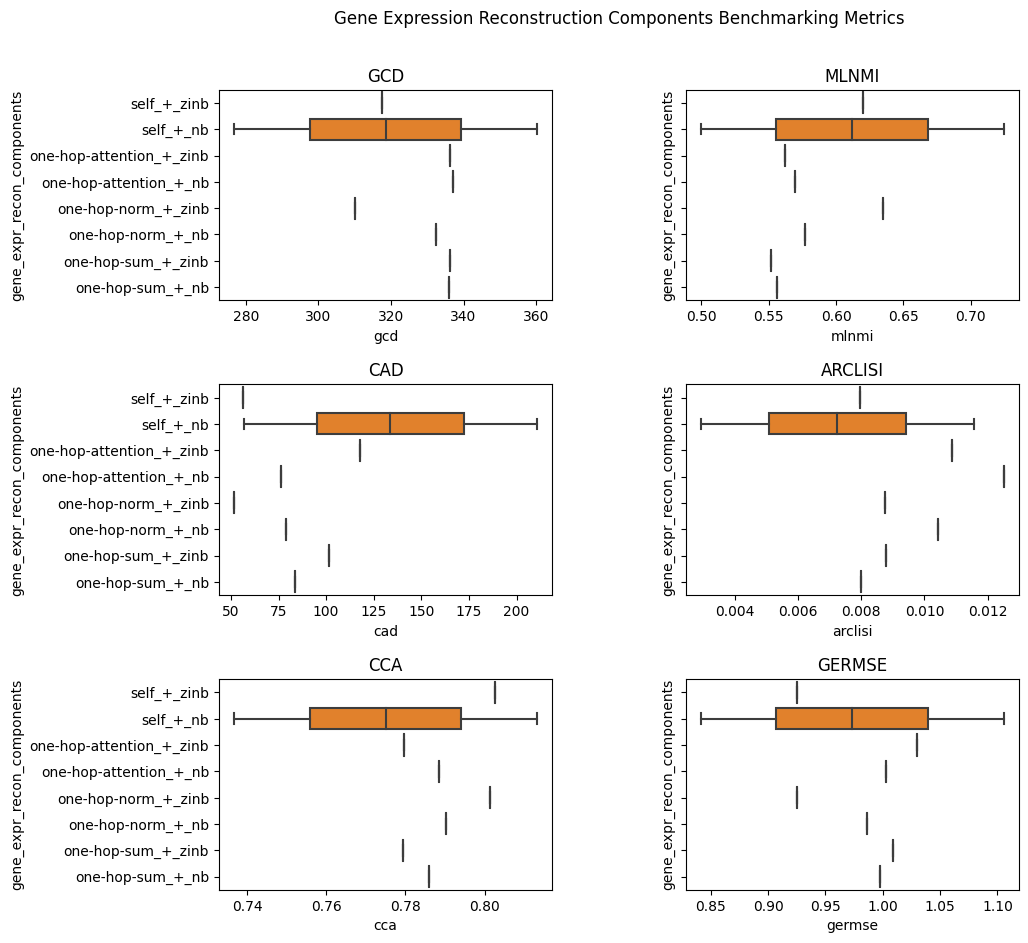

In [16]:
fig, axes = plt.subplots(3, 2, sharey=True, figsize=(10, 10))
fig.suptitle("Gene Expression Reconstruction Components Benchmarking Metrics")

# Graph Connectivity Distance
sns.boxplot(data=df, ax=axes[0, 0], x="gcd", y="gene_expr_recon_components")
axes[0, 0].set_title("GCD")

# Maximum Leiden Normalized Mutual Info
sns.boxplot(data=df, ax=axes[0, 1], x="mlnmi", y="gene_expr_recon_components")
axes[0, 1].set_title("MLNMI")

# Cell-Type Affinity Distance
sns.boxplot(data=df, ax=axes[1, 0], x="cad", y="gene_expr_recon_components")
axes[1, 0].set_title("CAD")

# Average Absolute Log Relative Cell-Type Local Inverse Simpson's Index
sns.boxplot(data=df, ax=axes[1, 1], x="arclisi", y="gene_expr_recon_components")
axes[1, 1].set_title("ARCLISI")

# Cell Classification Accuracy
sns.boxplot(data=df, ax=axes[2, 0], x="cca", y="gene_expr_recon_components")
axes[2, 0].set_title("CCA")

# Gene Expression Regression Mean Squared Error
sns.boxplot(data=df, ax=axes[2, 1], x="germse", y="gene_expr_recon_components")
axes[2, 1].set_title("GERMSE")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)